In [1]:
import pandas as pd
import sys
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt
import datetime
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib
#sns.set(style = "ticks")
sns.set(style = "ticks",context = "notebook")

%matplotlib inline

#print(plt.style.available)
plt.style.use("dark_background")

#matplotlib.rcParams['figure.dpi'] = 300


ModuleNotFoundError: No module named 'sklearn'

Download the data from 

https://drive.google.com/open?id=0B28c493CP9GtMzN1emFoMkJNNlU


#hubway_stations = pd.read_csv("/Users/tobiasklein 1/Dropbox/Data_Science/courses/cs109/Data/hubway_data"
#                             "/hubway_stations.csv", low_memory=False)[['id', 'lat', 'lng']] 
#hubway_stations.describe()
#print(hubway_stations.describe())
#hubway_stations.head()

# First Look At The Data

In [2]:
hubway_data = pd.read_csv("/Users/tobiasklein 1/Dropbox/Data_Science/courses/cs109/Data/hubway_data/hubway_trips.csv", low_memory = False)[["seq_id","hubway_id","status","duration","start_date","strt_statn","end_date","end_statn","bike_nr","subsc_type","zip_code","birth_date","gender"]]
#print(hubway_data)
print(hubway_data.head())


   seq_id  hubway_id  status  duration          start_date  strt_statn  \
0       1          8  Closed         9  7/28/2011 10:12:00        23.0   
1       2          9  Closed       220  7/28/2011 10:21:00        23.0   
2       3         10  Closed        56  7/28/2011 10:33:00        23.0   
3       4         11  Closed        64  7/28/2011 10:35:00        23.0   
4       5         12  Closed        12  7/28/2011 10:37:00        23.0   

             end_date  end_statn bike_nr  subsc_type zip_code  birth_date  \
0  7/28/2011 10:12:00       23.0  B00468  Registered   '97217      1976.0   
1  7/28/2011 10:25:00       23.0  B00554  Registered   '02215      1966.0   
2  7/28/2011 10:34:00       23.0  B00456  Registered   '02108      1943.0   
3  7/28/2011 10:36:00       23.0  B00554  Registered   '02116      1981.0   
4  7/28/2011 10:37:00       23.0  B00554  Registered   '97214      1983.0   

   gender  
0    Male  
1    Male  
2    Male  
3  Female  
4  Female  


# Who?

In [4]:
year_to_age = lambda s: 0 if 'N' in s else 2018 - int(s)

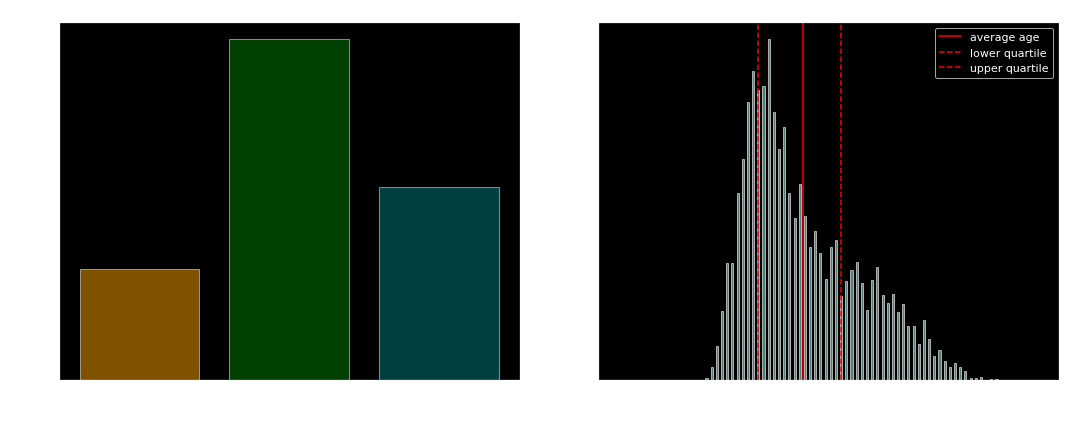

In [5]:
[fig, ax] = plt.subplots(1, 2, figsize=(15, 6))
gender_counts = np.unique(hubway_data['gender'].replace(np.nan, 'NaN', regex=True).values, return_counts=True)
ax[0].bar(range(3), gender_counts[1], align='center', color=['orange', 'green', 'teal'], alpha=0.5)
ax[0].set_xticks([0, 1, 2])
ax[0].set_xticklabels(['none', 'male', 'female', ' '])
ax[0].set_title('Users by Gender')

age_col = 2017.0 - hubway_data['birth_date'].dropna().values
age_counts = np.unique(age_col, return_counts=True)
ax[1].bar(age_counts[0], age_counts[1], align='center', width=0.4, alpha=0.6)
ax[1].axvline(x=np.mean(age_col), color='red', label='average age')
ax[1].axvline(x=np.percentile(age_col, 25), color='red', linestyle='--', label='lower quartile')
ax[1].axvline(x=np.percentile(age_col, 75), color='red', linestyle='--', label='upper quartile')
ax[1].set_xlim([1, 90])
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Number of Checkouts')
ax[1].legend()
ax[1].set_title('Users by Age')

plt.tight_layout()
plt.show()

# Where

In [6]:
hubway_stations = pd.read_csv("/Users/tobiasklein 1/Dropbox/Data_Science/courses/cs109/Data/hubway_data/hubway_stations.csv", low_memory=False)[["id", "lat", "lng"]] 
print(hubway_stations.head()); hubway_data.head()

   id        lat        lng
0   3  42.340021 -71.100812
1   4  42.345392 -71.069616
2   5  42.341814 -71.090179
3   6  42.361285 -71.065140
4   7  42.353412 -71.044624


,seq_id,hubway_id,status,duration,start_date,strt_statn,end_date,end_statn,bike_nr,subsc_type,zip_code,birth_date,gender
0,1,8,Closed,9,7/28/2011 10:12:00,23.0,7/28/2011 10:12:00,23.0,B00468,Registered,'97217,1976.0,Male
1,2,9,Closed,220,7/28/2011 10:21:00,23.0,7/28/2011 10:25:00,23.0,B00554,Registered,'02215,1966.0,Male
2,3,10,Closed,56,7/28/2011 10:33:00,23.0,7/28/2011 10:34:00,23.0,B00456,Registered,'02108,1943.0,Male
3,4,11,Closed,64,7/28/2011 10:35:00,23.0,7/28/2011 10:36:00,23.0,B00554,Registered,'02116,1981.0,Female
4,5,12,Closed,12,7/28/2011 10:37:00,23.0,7/28/2011 10:37:00,23.0,B00554,Registered,'97214,1983.0,Female


In [14]:
hubway_data_with_gps = hubway_data.join(hubway_stations.set_index("id"), on="strt_statn")

print(hubway_data_with_gps.head())


   seq_id  hubway_id  status  duration          start_date  strt_statn  \
0       1          8  Closed         9  7/28/2011 10:12:00        23.0   
1       2          9  Closed       220  7/28/2011 10:21:00        23.0   
2       3         10  Closed        56  7/28/2011 10:33:00        23.0   
3       4         11  Closed        64  7/28/2011 10:35:00        23.0   
4       5         12  Closed        12  7/28/2011 10:37:00        23.0   

             end_date  end_statn bike_nr  subsc_type zip_code  birth_date  \
0  7/28/2011 10:12:00       23.0  B00468  Registered   '97217      1976.0   
1  7/28/2011 10:25:00       23.0  B00554  Registered   '02215      1966.0   
2  7/28/2011 10:34:00       23.0  B00456  Registered   '02108      1943.0   
3  7/28/2011 10:36:00       23.0  B00554  Registered   '02116      1981.0   
4  7/28/2011 10:37:00       23.0  B00554  Registered   '97214      1983.0   

   gender        lat        lng  
0    Male  42.359677 -71.059364  
1    Male  42.359677 -71

![Alt](images/Lecture0_g2.png)

# When

In [8]:
[-8:-6]

SyntaxError: invalid syntax (<ipython-input-8-924c7e991cf7>, line 1)

In [9]:
#check_out_times = pd.to_datetime(hubway_data['start_date'])
check_out_hours = hubway_data["start_date"].apply(lambda s: int(s[-8:-6]))

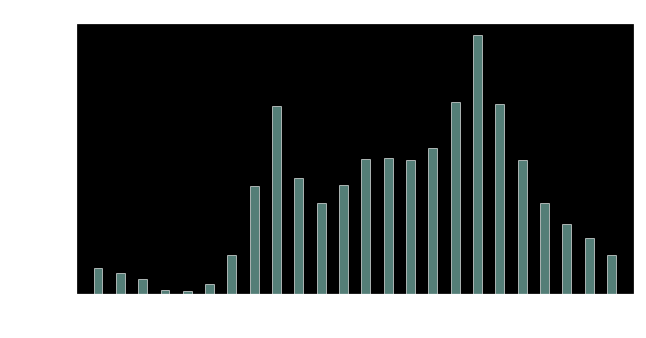

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

check_out_counts = np.unique(check_out_hours, return_counts=True)
ax.bar(check_out_counts[0], check_out_counts[1], align='center', width=0.4, alpha=0.6)
ax.set_xlim([-1, 24])
ax.set_xticks(range(24))
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Number of Checkouts')
ax.set_title('Time of Day vs Checkouts')

plt.show()

# How

In [10]:
def haversine(pt, lat2=42.355589, lon2=-71.060175):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    lon1 = pt[0]
    lat1 = pt[1]
    
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 3956 # Radius of earth in miles
    return c * r

In [11]:
station_counts = np.unique(hubway_data_with_gps["strt_statn"].dropna(), return_counts=True)
counts_df = pd.DataFrame({'id':station_counts[0], 'checkouts':station_counts[1]})
counts_df = counts_df.join(hubway_stations.set_index('id'), on='id')
counts_df.head()

,id,checkouts,lat,lng
0,3.0,9734,42.340021,-71.100812
1,4.0,18058,42.345392,-71.069616
2,5.0,10630,42.341814,-71.090179
3,6.0,23322,42.361285,-71.065140
4,7.0,9163,42.353412,-71.044624


In [24]:
counts_df.loc[:, 'dist_to_center'] = list(map(haversine, counts_df[['lng', 'lat']].values))
counts_df.head()

,id,checkouts,lat,lng,dist_to_center
0,3.0,9734,42.340021,-71.100812,2.335706
1,4.0,18058,42.345392,-71.069616,0.853095
2,5.0,10630,42.341814,-71.090179,1.802423
3,6.0,23322,42.361285,-71.065140,0.467803
4,7.0,9163,42.353412,-71.044624,0.807582


/Users/tobiasklein 1/PycharmsProjects/sogood/env/lib/python3.7/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


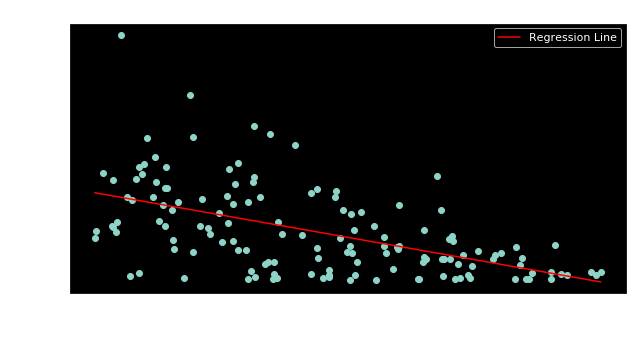

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.scatter(counts_df['dist_to_center'].values, counts_df['checkouts'].values)

reg_line = LinearRegression()
reg_line.fit(counts_df['dist_to_center'].values.reshape((len(counts_df['dist_to_center']), 1)), counts_df['checkouts'].values)

distances = np.linspace(counts_df['dist_to_center'].min(), counts_df['dist_to_center'].max(), 50)

ax.plot(distances, reg_line.predict(distances.reshape((len(distances), 1))), color='red', label='Regression Line')

ax.set_xlabel('Distance to City Center (Miles)')
ax.set_ylabel('Number of Checkouts')
ax.set_title('Distance to City Center vs Checkouts')
ax.legend()

plt.show()